In [1]:
from api import API

/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/16110083/anaconda3/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     #'FHMM_EXACT':{},'Mean': {}
      "FHMM_EXACT":{},"RNN":{'n_epochs':50,'batch_size':1024},"Seq2Point":{'n_epochs':50,'batch_size':1024},
      #"Seq2Seq":{'n_epochs':50,'batch_size':1024},"DAE":{'n_epochs':50,'batch_size':1024},"WindowGRU":{'n_epochs':30,'batch_size':1024}

  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport.hdf5',
				'buildings': {
				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport.hdf5',
			'buildings': {
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}

Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
............  mae  ..............
                  FHMM_EXACT        RNN  Seq2Point
fridge             15.815448  10.774202   5.914856
air conditioner    27.830650  14.174151   6.575021
electric furnace   50.480328   8.322783   3.929179
washing machine    18.582607   7.613209   1.013751
Dropping missing values
Creating an Artificial Aggregate
............  mae  ..............
                  FHMM_EXACT        RNN  Seq2Point
fridge             12.326984  11.257750   8.258245
air conditioner    21.231747   7.755187   3.275507
electric furnace   14.295834   9.633741   2.371637
washing machine    17.044842   9.333190   5.884327


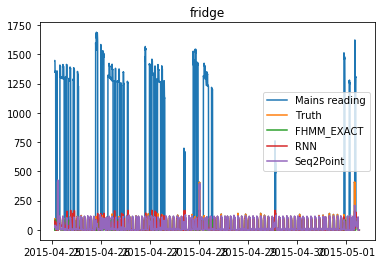

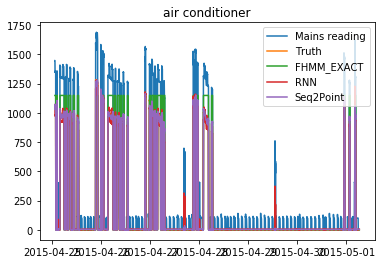

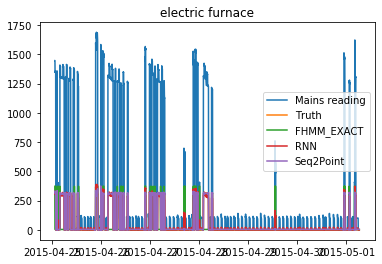

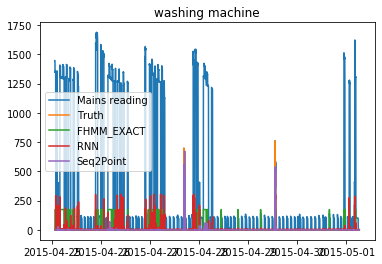

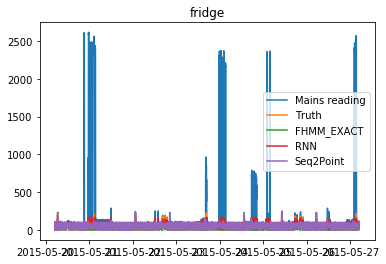

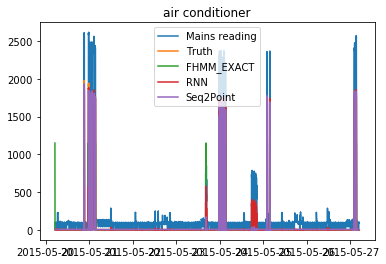

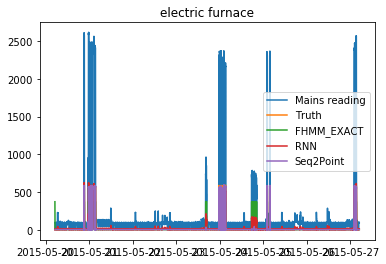

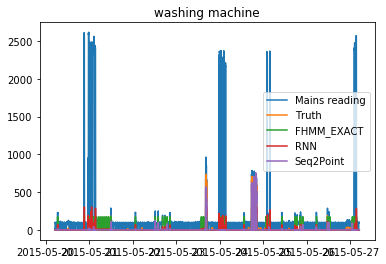

In [3]:
api_res = API(redd)


In [7]:
api_res.errors

[                  FHMM_EXACT        Mean        RNN  Seq2Point    Seq2Seq  \
 fridge             15.815448   48.931244  10.774205   4.533719   9.024936   
 air conditioner    27.830650  217.217117  14.174114   5.798602  12.256745   
 electric furnace   50.480328   70.432358   8.322783   4.851285   5.517611   
 washing machine    18.582607    7.248257   7.610896   1.086767   4.229948   
 
                         DAE  WindowGRU  
 fridge            15.042142  10.977711  
 air conditioner   11.099429  10.964609  
 electric furnace   6.219861   6.531579  
 washing machine    2.710392   0.890054  ,
                   FHMM_EXACT        Mean        RNN  Seq2Point    Seq2Seq  \
 fridge             12.326984   39.046425  11.257752   6.859794  10.235799   
 air conditioner    21.231747  135.736282   7.755166   2.707511   6.309859   
 electric furnace   14.295834   42.080956   9.633744   1.557917   4.898435   
 washing machine    17.044842   15.130778   9.332244   5.846516   9.644535   
 
     

In [8]:
import numpy as np
import pandas as pd

vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("STD")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                  FHMM_EXACT        Mean        RNN  Seq2Point   Seq2Seq  \
fridge             14.071216   43.988834  11.015979   5.696756  9.630367   
air conditioner    24.531199  176.476700  10.964640   4.253056  9.283302   
electric furnace   32.388081   56.256657   8.978264   3.204601  5.208023   
washing machine    17.813725   11.189517   8.471570   3.466641  6.937242   

                        DAE  WindowGRU  
fridge            14.270748   8.515194  
air conditioner    8.903478   7.301316  
electric furnace   5.164573   5.356080  
washing machine    5.805217   3.520338  



STD
                  FHMM_EXACT       Mean       RNN  Seq2Point   Seq2Seq  \
fridge              1.744232   4.942410  0.241774   1.163037  0.605432   
air conditioner     3.299452  40.740417  3.209474   1.545545  2.973443   
electric furnace   18.092247  14.175701  0.655480   1.646684  0.309588   
washing machine     0.768883   3.941261  0.860674   2.379875  2.707294   

                       DAE  